In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
train = pd.read_csv(r'C:\Users\Helio\Documents\ALL THAT MATTERS\5 SEMESTRE - EESP\MACHINE LEARNING\Aula 2\titanic data\train.csv')
test = pd.read_csv(r'C:\Users\Helio\Documents\ALL THAT MATTERS\5 SEMESTRE - EESP\MACHINE LEARNING\Aula 2\titanic data\test.csv')

In [5]:
train["Age"] = train["Age"].fillna(train["Age"].median())

In [6]:
train["Child"] = float('NaN')

In [7]:
train['Child'][train['Age'] < 14] = 1
train['Child'][train['Age'] >= 14] = 0

C:\Users\Helio\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Helio\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [8]:
train["Sex"][train["Sex"] == "male"] = 0
train["Sex"][train['Sex'] == 'female'] = 1

C:\Users\Helio\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Helio\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [9]:
train["Embarked"] = train['Embarked'].fillna('S')
train["Embarked"][train["Embarked"] == "S"] = 0
train["Embarked"][train["Embarked"] == "C"] = 1
train["Embarked"][train["Embarked"] == "Q"] = 2

C:\Users\Helio\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Helio\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Helio\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [10]:
test.Fare[152] = test['Fare'].median()

C:\Users\Helio\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [11]:
y = train['Survived'].values
x = train.drop(['Survived','Name','Ticket','Cabin'], axis=1).values

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42, stratify=y)

In [16]:
tree = DecisionTreeClassifier(max_depth=2, random_state=42)
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [18]:
print("Accuracy na amostra de treino: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy na amostra de teste: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy na amostra de treino: 0.805
Accuracy na amostra de teste: 0.760


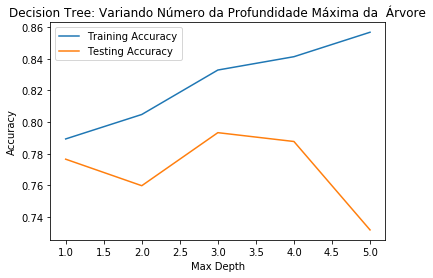

In [19]:
depths = np.arange(1, 6)
train_accuracy = np.empty(len(depths))
test_accuracy = np.empty(len(depths))

for i, k in enumerate(depths):
    tree = DecisionTreeClassifier(max_depth= k)

    tree.fit(X_train, y_train)
    
    train_accuracy[i] = tree.score(X_train, y_train)

    test_accuracy[i] = tree.score(X_test, y_test)

plt.title('Decision Tree: Variando Número da Profundidade Máxima da  Árvore')
plt.plot(depths, train_accuracy, label = 'Training Accuracy')
plt.plot(depths, test_accuracy, label = 'Testing Accuracy')
plt.legend()
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.show()

In [20]:
test_accuracy.argmax() #maxdepth = 3

2

In [21]:
test_accuracy.max()

0.79329608938547491

In [22]:
tree = DecisionTreeClassifier(max_depth=3, random_state=42)
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [23]:
from sklearn.tree import export_graphviz

covariadas = list(train.drop(['Survived','Name','Ticket','Cabin'], axis=1))

export_graphviz(
        tree,
        out_file=("clf_tree.dot"),
        feature_names = covariadas,
        class_names= ['baixo', 'alto'],
        rounded=True,
        filled=True
    )

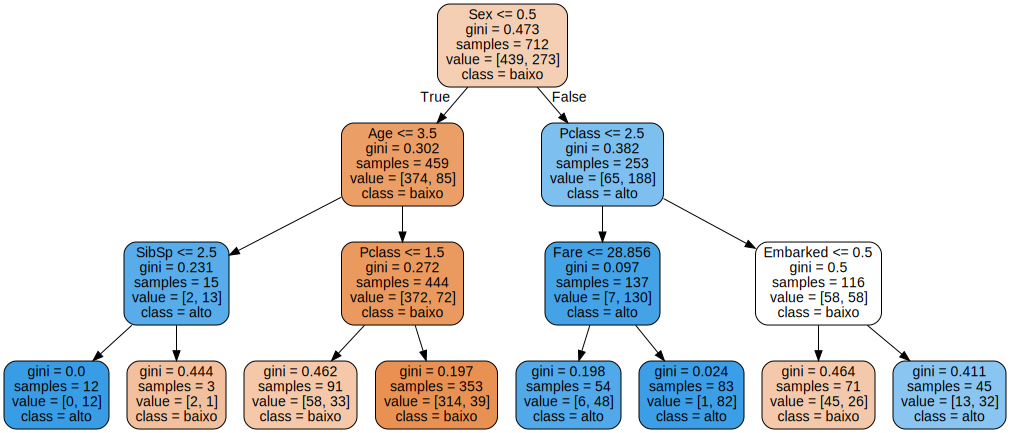

In [24]:
import graphviz

with open("clf_tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [28]:
print("Feature importances:\n{}".format(tree.feature_importances_))

Feature importances:
[ 0.          0.21602727  0.6354416   0.09014511  0.01335186  0.
  0.00401871  0.04101545  0.        ]


In [78]:
import seaborn as sns

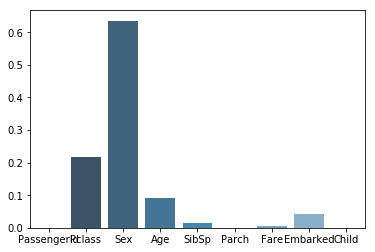

In [96]:
sns.barplot(y=tree.feature_importances_, x=covariadas, palette="Blues_d")

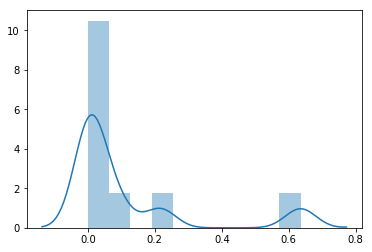

In [94]:
sns.distplot(tree.feature_importances_, bins=10)

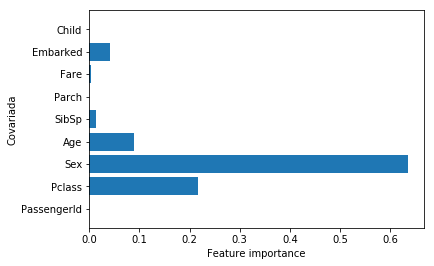

In [33]:
n_features = x.shape[1]

plt.barh(range(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), covariadas)
plt.xlabel("Feature importance")
plt.ylabel("Covariada")
plt.show()

In [34]:
from sklearn.model_selection import GridSearchCV

In [111]:
parameters = {'criterion':('gini','entropy'), 'max_depth':range(1,6), 'min_samples_split':range(2,11),
             'max_features':('auto', 'sqrt', 'log2', None)}

In [112]:
tree_opt = DecisionTreeClassifier()
gscv =GridSearchCV(tree_opt, parameters, cv = 5, return_train_score=True)
gscv.fit(X_train, y_train)
gscv.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=7,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [113]:
gscv.best_estimator_.score(X_test, y_test)

0.78212290502793291

In [114]:
gscv.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=7,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [105]:
from sklearn.ensemble import RandomForestClassifier

In [106]:
rf_clf = RandomForestClassifier(n_estimators = 10)

In [109]:
rf_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [110]:
rf_clf.score(X_test, y_test)

0.81564245810055869